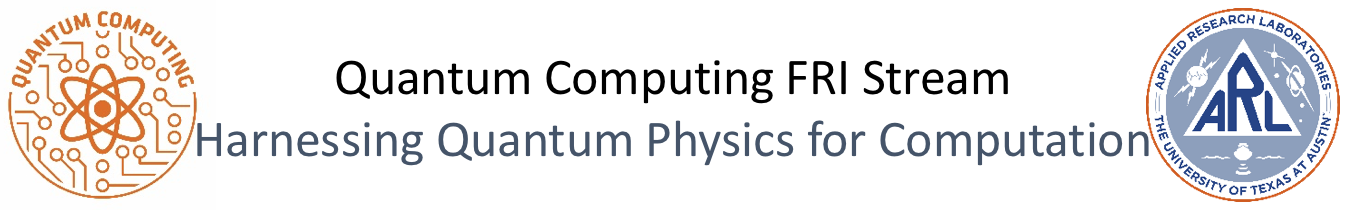

# Quantum Computer Games
## Project Motivation


## Installations and Imports

In [ ]:
#In case you don't have qiskit, install it now
%pip install qiskit --quiet
%pip install qiskit-aer --quiet

In [ ]:
#Installing/upgrading pylatexenc seems to have fixed my mpl issue
#If you try this and it doesn't work, try also restarting the runtime/kernel
%pip install pylatexenc --quiet

In [ ]:
#Let's go ahead and import all this stuff too
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector, plot_bloch_vector
import getpass

## Today's Objectives

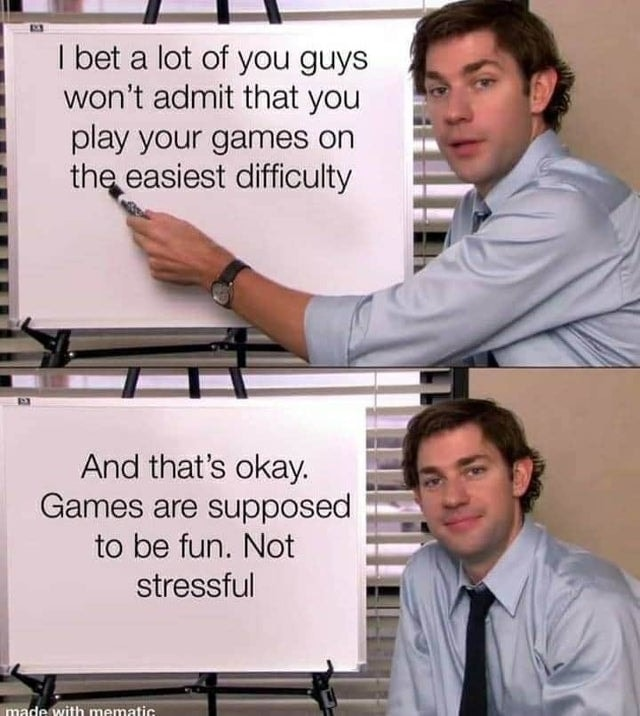

- Establish what it means for something to be a game
- Motivate game-development as a pursuit
- Relate games to quantum computing
- Prepare ourselves to create our own quantum computer games!

## What's in a game?

A game has a goal, rules, and feedback.

Why care about games?
  - Games engage people
    - This can make teaching more effective
      - By keeping attention
      - By accessing the player's memory
      - By lowering the stakes
    - Direct feedback to the player
  - Show off the technology
    - Long history of games for tech
      - 1950s produced games for Tic Tac Toe, Checkers, Tennis for Two with vacuum tube switches and displays
      - Most new gaming consoles are specialized computers with state of the art performance
  - Because games are fun. Because we can!



## All of this can apply to Quantum Computers!

- Games engage people
  - We can teach quantum concepts through games
  - We can immerse players in "quantum environments" to develop their intuition
- Show off the technology
  - Are there games that can run on the best quantum computer but not the second best
    - What does "best" mean in this context?
  - What games can run on any quantum computer?
    - What does "quantum computer" mean in this context?
- Games are fun. Make quantum games because we can.


### Quantum Games

In fact, it's already common to use games to describe quantum situations!

For example: the CHSH game demonstrates entanglement through Alice and Bob playing a game with Charlie as the referee.

Charlie sends bit x to Alice and bit y to Bob. Without communicating classically, Alice and Bob then send bits a and b to Charlie.

If $a\oplus b = x \wedge y$ then Alice and Bob win.

### What makes a quantum game? **Quantum Features**

**Superposition**, **Entanglement**, **Interference**, **Quantum Measurement**

At least some of these quantum features should be present in the game for the player to manipulate and/or experience.


## Examples

### Rock Paper Qiskit

A version of Noah Davis's first quantum computer game.

A $\Psi^-$ state is prepared. Each player may perform a **H**, **CNOT**, or an **I** gate.

Player 0 wishes to stay in the Bell Basis. Player 1 wishes to change the basis.

In [ ]:
#Prepare a Bell state as the playing field
qc = QuantumCircuit(2,2)

qc.h(0)
qc.cx(0,1)
qc.x(1)
qc.z(1)

qc.barrier()

qc.draw()

In [ ]:
#Ask each player to make a move
m0=getpass.getpass('Player 0, choose H, C \n Any other entry will be treated as Identity \n')
m1=getpass.getpass('Player 1, choose H, C \n Any other entry will be treated as Identity \n')

In [ ]:
#Apply the players' moves
if m0=='H':
  qc.h(0)
elif m0=='C':
  qc.cx(0,1)
else:
  qc.i(0)

if m1=='H':
  qc.h(1)
elif m1=='C':
  qc.cx(0,1)
else:
  qc.i(1)

qc.barrier()

#Bell Measurement
qc.cx(0,1)
qc.h(0)
qc.measure([0,1],[0,1])
qc.draw()

In [ ]:
#Determine the winner
shotnum=1024
counts = execute(qc, backend = Aer.get_backend('qasm_simulator'), shots=shotnum).result().get_counts(qc)
winThreshold=.75
for keys in counts:
  if counts[keys]/shotnum>winThreshold:
    print('Still a Bell state. Player 0 wins!')
  else:
    print('No longer a Bell state. Player 1 wins!')
    break

In [ ]:
plot_histogram(counts)

### Quantum Battleships

Adapted from James Wootton

https://decodoku.medium.com/quantum-battleships-the-first-multiplayer-game-for-a-quantum-computer-e4d600ccb3f3

In [ ]:
%pip install projectq

In [ ]:
import math, numpy, random, time, getpass # normal python stuff

from projectq import MainEngine  # import the main compiler engine
from projectq.ops import H, S, T, X, CNOT, Entangle, get_inverse, Measure  # import the operations we want to perform

import projectq.setups.ibm
from projectq.backends import IBMBackend

In [ ]:
eng = MainEngine()#IBMBackend(use_hardware=True, num_runs=1024, verbose=False))

In [ ]:
print("\n\n\n\n===== Welcome to Quantum Battleships! =====\n\n")
print("  ~~ A game by the Decodoku project ~~ ")
print("\n\n")
print("When in doubt, press any key to continue!")
print()
print("This is a game for two players.")
print()
print("Player 1 will choose the position of a Battleship.")
print()
print("Player 2 will try to bomb it.")
print()

In [ ]:
# get player 1 to position boat
print("We start with Player 1.")
print("Look away Player 2!")
print()
print("The lines in the bowtie shape below are the places you can place your ship.\n")
print("|\     /|")
print("| d   b |")
print("|  \ /  |")
print("f   X   a")
print("|  / \  |")
print("| e   c |")
print("|/     \|\n")
# note: at time of release, ProjectQ does not actually put the qubits in the places you'd expect on the IBM chip
print()

In [ ]:
chosen = 0
while (chosen==0):
	ship = getpass.getpass("Choose a line for your ship. (a, b, c, d, e or f)\n")
	if ship in ["a","b","c","d","e","f"]:
		chosen = 1
	else:
		print("u wot m8? Try that again.")

In [ ]:
# get player 2 to position three bombs
time.sleep(1)
print("\nPlayer 2: You're up!")
print()
print("The numbers below mark places you can bomb.\n")
print("4       0")
print("|\     /|")
print("| \   / |")
print("|  \ /  |")
print("|   2   |")
print("|  / \  |")
print("| /   \ |")
print("|/     \|")
print("3       1\n")
print()

In [ ]:
chosen = 0
while (chosen==0):
    bomb1 = int(input("Choose a position for your first bomb. (0, 1, 2, 3 or 4)\n"))
    if ( (bomb1 >= 0) & (bomb1 < 5) ):
        chosen = 1
    else:
        print("u wot m8? Try that again.")

chosen = 0
while (chosen==0):
    bomb2 = int(input("\nChoose a position for your second bomb. (0, 1, 2, 3 or 4)\n"))
    if ( (bomb1 >= 0) & (bomb1 < 5) ):
        if (bomb2 != bomb1):
            chosen = 1
        else:
            print("That's already been bombed. Choose again.")
    else:
        print("u wot m8? Try that again.")

chosen = 0
while (chosen==0):
    bomb3 = int(input("\nChoose a position for your third and final bomb. (0, 1, 2, 3 or 4)\n"))
    if ( (bomb1 >= 0) & (bomb1 < 5) ):
        if bomb3 not in [bomb1,bomb2]:
            chosen = 1
        else:
            print("That's already been bombed. Choose again.")
    else:
        print("u wot m8? Try that again.")


In [ ]:
# now all that's left is to run the scenario on the qubits and see what happens
print("\nWe'll now run this scenario on IBM's qubits and see what happens.")
print()
print("But first you'll have to sign in...\n")

In [ ]:
# prepare qubits
qubits = eng.allocate_qureg(5)

# make the ship: an entangled pairs prepared for a CHSH experiment
# first we make a Bell pair with H and CNOT
# then use an X to anticocorrelate Z basis (measurements will be made in x-y plane)
# then do a T on any Bobs (higher numbered qubit)
bobs = [0]*5
if (ship == "a"): # a means 0 and 1
	H | qubits[0]
	CNOT | (qubits[0], qubits[1])
	X | qubits[0]
	bobs[0] = 1
	T | qubits[0]
if (ship == "b"): # b means 0 and 2
	H | qubits[0]
	CNOT | (qubits[0], qubits[2])
	X | qubits[0]
	bobs[0] = 1
	T | qubits[0]
if (ship == "c"): # c means 1 and 2
	H | qubits[1]
	CNOT | (qubits[1], qubits[2])
	X | qubits[1]
	bobs[1] = 1
	T | qubits[1]
if (ship == "d"): # d means 2 and 4
	H | qubits[4]
	CNOT | (qubits[4], qubits[2])
	X | qubits[4]
	bobs[2] = 1
	T | qubits[2]
if (ship == "e"): # e means 2 and 3
	H | qubits[3]
	CNOT | (qubits[3], qubits[2])
	X | qubits[3]
	bobs[2] = 1
	T | qubits[2]
if (ship == "f"): # f means 3 and 4
	H | qubits[3]
	CNOT | (qubits[3], qubits[4])
	X | qubits[3]
	bobs[3] = 1
	T | qubits[3]


In [ ]:
# apply the bombs
# whether or not a bomb is applied corresponds to the two measurment choices for CHSH (in x-y plane)
if (bobs[bomb1]==1):
	get_inverse(S) | qubits[bomb1]
else:
	S | qubits[bomb1]
if (bobs[bomb2]==1):
	get_inverse(S) | qubits[bomb2]
else:
	S | qubits[bomb2]

# measure all in X basis
H | qubits[0]
Measure | qubits[0]
H | qubits[1]
Measure | qubits[1]
H | qubits[2]
Measure | qubits[2]
H | qubits[3]
Measure | qubits[3]
H | qubits[4]
Measure | qubits[4]

eng.flush()  # flush all gates (and execute measurements)

In [ ]:
time.sleep(1)
print("\nNow let's see how intact the ship is.")
print("Between 1% and 100% intact means it's still afloat.")
print("Between -1% and -100% intact means it's swimming with the fishes.")
print("0% intact could go either way.")

In [ ]:
#results = eng.backend.get_probabilities(qubits) # get probabilities
#results=[]
results={}
# fill in mising values
for b1 in range(2):
  for b2 in range(2):
    for b3 in range(2):
      for b4 in range(2):
        for b5 in range(2):
          bitString = str(b1) + str(b2) + str(b3) + str(b4) + str(b5)
          #results+=[bitString,eng.backend.get_probability(bitString,qubits)]
          results[bitString] = eng.backend.get_probability(bitString,qubits)
          #if bitString not in results:
					#	results[bitString] = 0

In [ ]:
# determine damage for ship
damage = 0
for b1 in range(2):
	for b2 in range(2):
		for b3 in range(2):

			if (ship == "a"): # a means 0 and 1
				damage = damage + results[ "01" + str(b1) + str(b2) + str(b3) ] + results[ "10" + str(b1) + str(b2) + str(b3) ]
			if (ship == "b"): # b means 0 and 2
				damage = damage + results[ "0" + str(b1) + "1" + str(b2) + str(b3) ] + results[ "1" + str(b1) + "0" + str(b2) + str(b3) ]
			if (ship == "c"): # c means 1 and 2
				damage = damage + results[ str(b1) + "01" + str(b2) + str(b3) ] + results[ str(b1) + "10" + str(b2) + str(b3) ]
			if (ship == "d"): # d means 2 and 4
				damage = damage + results[ str(b1) + str(b2) + "0" + str(b3) + "1" ] + results[ str(b1) + str(b2) + "1" + str(b3) + "0" ]
			if (ship == "e"): # e means 2 and 3
				damage = damage + results[ str(b1) + str(b2) + "01" + str(b3) ] + results[ str(b1) + str(b2) + "10" + str(b3) ]
			if (ship == "f"): # f means 3 and 4
				damage = damage + results[ str(b1) + str(b2) + str(b3) + "01" ] + results[ str(b1) + str(b2) + str(b3) +"10" ]



In [ ]:
time.sleep(1)
print("\nThe ship is " + str(int( 100*(1-2*damage) )) + "% intact")
print("(which means " + str(int( -100*(1-2*damage) )) + "% broken).\n")
if (damage>0.5):
	print("It has been destroyed!\nPlayer 2 wins!\n\n")
else:
    print("It's still afloat!\nPlayer 1 wins!\n\n")


### Quantum Tic Tac Toe

Adapted from Chris Ferrie

https://csferrie.medium.com/i-played-tic-tac-toe-on-a-quantum-computer-and-won-bbaca1c7bb82

#### Preamble

Run this cell to import all the necessary libraries and set up the game logic.


In [ ]:
%pip install qiskit --quiet
%pip install pylatexenc --quiet

In [ ]:
import qiskit
from qiskit.visualization import plot_histogram
from google.colab import widgets
#from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, Button, Layout
import ipywidgets
import pandas as pd
import math
import numpy as np
import random
from IPython.display import clear_output

#### The code for the game comprises the two classes below. Edit at your peril. But, also, edit if you want to change the rules of the game!

In [ ]:
class Board:
    def __init__(self):
        self.qc = QuantumCircuit(game_size, game_size)
        self.function = ''
        self.target = -1
        self.tab = []
        self.winsX = 0
        self.winsO = 0

        for idx in range(0, game_size):
            self.tab.append({'default':str(idx), 'player':' '})
            self.qc.reset(idx)
            self.qc.h(idx)
        self.qc.barrier()

    def make_move(self, cell):
        if self.function == 'Not':
            self.qc.x(cell)
            self.tab[int(cell)]['player'] += 'N - '
        elif self.function == 'O':
            self.qc.ry(1*np.pi/2, cell)
            self.tab[int(cell)]['player'] += "O - "
        elif self.function == 'X':
            self.qc.ry(1*-np.pi/2, cell)
            self.tab[int(cell)]['player'] += "X - "
        elif self.function == 'SWAP' and self.target != cell:
            if self.target == cell:
                self.target = -1
            else:
                self.qc.swap(cell, self.target)
                self.tab[int(cell)]['player'] += "S - "
                self.tab[int(self.target)]['player'] += "S - "

    def results(self):
        display(self.qc.draw('mpl'))
        self.qc = QuantumCircuit(game_size, game_size)

    def display(self):
        display(self.qc.draw('mpl'))

    def measure(self):
        self.qc.barrier()
        for i in range(0,game_size):
            self.qc.measure(i, i)

        job = qiskit.execute(self.qc, backend, shots=1, memory=True)
        output = job.result().get_memory()[0]

        for i in range(0,game_size):
            if output[game_size-1-i] == '0':
                self.tab[i]['player'] = 'X'
            else:
                self.tab[i]['player'] = 'O'
        self.winsX = self.countWinners('X')
        self.winsO = self.countWinners('O')

    def countWinners(self, player):
        if game_size == 9:
          winners = ((0,1,2),(3,4,5),(6,7,8),(0,3,6),(1,4,7),(2,5,8),(0,4,8),(2,4,6))
        else:
          winners = ((0,1),(2,3),(0,2),(1,3),(0,3),(1,2))
        wins = 0
        for i in range(len(winners)):
            won = True
            for j in range(len(winners[0])):
                if not self.tab[winners[i][j]]['player'] == player:
                    won = False
            if won:
                wins = wins + 1
        return wins

    def new(self):
        self.tab.clear()
        for idx in range(0,game_size):
           self.tab.append({'default':str(idx), 'player':''})
           self.qc.reset(idx)
           self.qc.h(idx)
        self.qc.barrier()

In [ ]:
class Game:
    def __init__(self):
        self.selecting = False
        self.board = Board()
        self.boardbutton_list = []
        for i in range(0,game_size):
            button = Button(description=str(i))
            button.on_click(self.handle_game)
            self.boardbutton_list.append(button)

        self.funcbutton_list = []
        self.newButton('Measure')
        self.newButton('Not')
        self.newButton('O')
        self.newButton('X')
        self.newButton('SWAP')
        self.printmenu()
        self.printBoard()

    def newButton(self, name):
        function = Button(description=name, layout=Layout(width='86px', height='30px'))
        function.on_click(self.handle_game)
        self.funcbutton_list.append(function)

    def handle_game(self, b):
        try:
            if b.description == 'Measure':
                clear_output()
                self.replay()
                self.board.measure()
                self.scoreboard()
                self.printBoard()
                self.board.results()


            if b.description == 'Replay':
                clear_output()
                self.board.new()
                self.printmenu()
                self.printBoard()

            if int(b.description) >= 0:
                if self.selecting:
                    self.board.target = int(b.description)
                else:
                    clear_output()
                    self.printmenu()
                    self.board.make_move(int(b.description))
                    self.printBoard()
                    self.board.display()
            self.selecting = False
        except ValueError:
            self.board.function = b.description
            self.selecting = False
            if self.board.function == 'SWAP':
                self.selecting = True

    def printmenu(self):
        grid = widgets.Grid(1, 5)
        for (row, col) in grid:
            display(self.funcbutton_list[col])

    def scoreboard(self):
        print("X wins: " + str(self.board.winsX) + "    O wins: " + str(self.board.winsO))

    def replay(self):
        rep = Button(description="Replay")
        rep.on_click(self.handle_game)
        display(rep)

    def printBoard(self):
        grid = widgets.Grid(1, int(np.sqrt(game_size)), header_row=True, header_column=True)
        for row in range(int(np.sqrt(game_size))):
              for (useless, col) in grid:
                  print("\n"+self.board.tab[col + row * int(np.sqrt(game_size))]['player']+"\n")
                  display(self.boardbutton_list[col + row * int(np.sqrt(game_size))])

#### Real Quantum Devices

You'll need an account on IBMQ to play the game on a real quantum device.

Ignore these cells if you don't want to run the game on a real quantum computer.

In [ ]:
# Enable your account on Qiskit, replace 'My_API_Token' with your newly generated token
qiskit.IBMQ.save_account('My_API_Token', overwrite=True)
qiskit.IBMQ.load_account()
# After loading credentials we query the backends
qiskit.IBMQ.ibmq.providers()

In [ ]:
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()

In [ ]:
backend = provider.get_backend('ibmq_quito')

if backend.configuration().n_qubits < 9:
  game_size = 4

#### Simulated Quantum Computer

If you chose to run the game on a simulator, run this cell. If you already set up your IBMQ backend, don't run this cell.

In [ ]:
backend = Aer.get_backend('aer_simulator')

game_size = 9

#### The game!

To make a move, click one of the 5 options above the board and then click the location where you want to make that move. To play "SWAP," you need to click two board locations.

All locations are initialized in the positive superposition state.

Each move adds a gate to the game circuit. They do the following:

  - Measure ends the round and execute the game circuit on the quantum device. The win conditions will be counted and displayed.
  - Not flips an "owned" tile to the other player. If the tile is not currently owned, this does nothing. [applies a NOT gate]
  - O turns the intial tile toward a tile owned by "O." [applies ry(pi/2)]
  - X turns the intial tile toward a tile owned by "X." [applies ry(-pi/2)]
  - SWAP swaps the location of two tiles.

As you play, you will see the game circuit and the board. The board shows the sequence of moves, but is not 100% accurate. The game circuit is true state of the game.

In [ ]:
game = Game()

## Other games

Many quantum games have been made with varying levels of incorporation of our desired quantum features. Others still have been conceptualized but not built. A sample of games for reference is given below:

- Quantum Tic-Tac-Toe (many versions)

- Quantum Minesweeper

- QCraft (a quantum Minecraft mod)

- Hello Quantum (https://helloquantum.mybluemix.net/)

- Quantum Chess (multiple versions)

## Some quantum games references

For early work on quantum games:

Quantum Games and Quantum Strategies by J. Eisert, M. Wilkens, M Lewenstein https://arxiv.org/abs/quant-ph/9806088

For some specific games:

Quantum Chess by Christopher Cantwell
https://arxiv.org/abs/1906.05836

A. Goff. Quantum tic-tac-toe: A teaching metaphor for superposition in quantum mechanics.
American Journal of Physics, 74:962–973, nov 2006.

Michal Gordon and Goren Gordon. Quantum computer games: quantum minesweeper.
Physics Education, 45(4):372, 2010.

Michal Gordon and Goren Gordon. Quantum computer games: Schrodinger cat and hounds.
Physics Education, 47(3):346, 2012.

Andr´e Ranchin. Quantum go. http://arxiv.org/abs/1603.04751v2.

Hello Quantum (https://helloquantum.mybluemix.net/)

qcraft wiki. https://sites.google.com/a/elinemedia.com/qcraft/.
